In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
## Import data

customers_df = pd.read_csv('/Users/User/Desktop/Python Libraries - Moed A Exam/customers.csv')
items_df = pd.read_csv('/Users/User/Desktop/Python Libraries - Moed A Exam/Items.csv')
orders_df = pd.read_csv('/Users/User/Desktop/Python Libraries - Moed A Exam/orders.csv')
order_item_df = pd.read_csv('/Users/User/Desktop/Python Libraries - Moed A Exam/order_item.csv')

In [4]:
## copy data

customers_df_copy = customers_df.copy()
items_df_copy = items_df.copy()
orders_df_copy = orders_df.copy()
order_item_df_copy = order_item_df.copy()

### 1 - Handle duplicate data in item dataset 

In [6]:
## Remove duplicate Same item name and same item brand.
duplicate_name_brand = items_df_copy[items_df_copy.duplicated(subset = ['item_name', 'item_brand'], keep = False)].sort_values('item_name')
duplicate_name_brand 

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability


The **'duplicate_name_brand'** dataframe was empty, which means there is no product with the same product name and brand name, so there is nothing to delete.

If it wasn't empty, I would store the new ID in the dictionary for each ID I deleted, then delete from **items_df_copy** and finally replace the Id in the **order_item_df_copy** .

In [8]:
## Remove duplicate Same item name and no brand vs with brand
duplicate_name_null = items_df_copy[items_df_copy.duplicated(subset = ['item_name'], keep = False)]
brand_not_null = duplicate_name_null[~duplicate_name_null['item_brand'].isna()]
brand_is_null = duplicate_name_null[duplicate_name_null['item_brand'].isna()]

dups_df = duplicate_name_null[(duplicate_name_null['item_name'].isin(brand_not_null['item_name'])) & (duplicate_name_null['item_name'].isin(brand_is_null['item_name']))]
dups_df

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
7,8,Headphone,NaN,3117.19,599.0,NaN,True
48,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False


In [9]:
item_id_map = {8:49}
items_df_copy.set_index('id', inplace=True)
items_df_copy.drop(item_id_map.keys(), axis=0, inplace=True)
items_df_copy = items_df_copy.reset_index()

## replace removed order id with the order that we didn't remove
order_item_df_copy['item_id'] = order_item_df_copy['item_id'].replace(item_id_map)

### 2 -  Handle duplicate data in customer dataset

In [11]:
## Remove duplicate emails 

duplicate_email_rows = customers_df_copy[customers_df_copy.duplicated('email', keep=False)]
duplicate_email_rows

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email


The **'duplicate_email_rows'**  data frame was empty, which means there is no customer with the same email, so there is nothing to delete.

If it were not empty, I would store the new customer ID in a dictionary for each ID I deleted, then delete from **customers_df_copy** and finally replace the ID in **orders_df_copy**.

### 3 - Handle missing data in all datasets

In [14]:
## Helper function for displaying missing data
def handle_missing_data(df):
    missing_data = df.isnull().sum()
    percentage_missing = df.isnull().sum() * 100 / df.isnull().count() 
    total_rows = df.isnull().count()
    final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Rows', 'Precent'])
    print(final_missing_data)
    print()

In [15]:
handle_missing_data(customers_df_copy)
# Fill missing data with default values:
customers_df_copy['age'] = customers_df_copy['age'].fillna(round(customers_df_copy['age'].mean()))
customers_df_copy['gender'] = customers_df_copy['gender'].fillna('Unknown')

# The percentage of people who don't have a joining_date are on the order table
# missing_date_df = customers_df_copy[customers_df_copy['joining_date'].isna()]
# missing_date_and_order = missing_date_df[~missing_date_df['id'].isin(orders_df_copy['customer_id'])]
# customers_df_copy = customers_df_copy[~customers_df_copy['id'].isin(missing_date_and_order['id'])]
# handle_missing_data(customers_df_copy) 

customers_df_copy['joining_date'] = customers_df_copy['joining_date'].fillna(pd.Timestamp('2025-01-01'))
handle_missing_data(customers_df_copy)

              Total Rows  Missing Rows  Precent
id                   500             0      0.0
first_name           500             0      0.0
last_name            500             0      0.0
gender               500            53     10.6
age                  500            25      5.0
nationallity         500             0      0.0
joining_date         500            61     12.2
phone_number         500             0      0.0
email                500             0      0.0

              Total Rows  Missing Rows  Precent
id                   500             0      0.0
first_name           500             0      0.0
last_name            500             0      0.0
gender               500             0      0.0
age                  500             0      0.0
nationallity         500             0      0.0
joining_date         500             0      0.0
phone_number         500             0      0.0
email                500             0      0.0



I chose to fill in the **gender** with "unknown" because there is no reason to delete a customer because of this.

I chose to fill in the **age** with the average age, since it is not a critical figure to delete a customer because of this, and so it will not greatly affect the calculations.

The **joining_date** was very difficult to decide because in the following questions this figure is very much investigated and therefore it is critical.
But I did not want to delete it because it was a high percentage of customers.
I also found that two-thirds of the customers who do not have a joining date bought things in 2023, which is another reason why it is important for me to keep them, so as not to delete data from the **orders_df** table as well.

So I gave them an unusual date so that it would not affect the results of the calculation on the joining date.

In [17]:
handle_missing_data(items_df_copy)

## Drop rows with missing item_brand
item_brand_null_df  = items_df_copy[items_df_copy['item_brand'].isna()]
order_item_df_copy = order_item_df_copy[~order_item_df_copy['item_id'].isin(item_brand_null_df['id'])]
items_df_copy = items_df_copy.dropna(subset=['item_brand']) 

## Fill missing data with default values:
stock_quantity_null_df  = items_df_copy[items_df_copy['stock_quantity'].isna()]
items_df_copy['stock_quantity'] = items_df_copy['stock_quantity'].fillna(0)

item_category_null_df  = items_df_copy[items_df_copy['item_category'].isna()]
item_category_unique = items_df_copy['item_category'].unique()

category_map = {'Tablet': 'Mobile Devices and Accessories', 'Drone': 'Photography Equipment' ,'CCTV Camera':'Photography Equipment', 'Video Game': 'Gaming Equipment', 'USB Flash Drive': 'Storage Devices' ,'Modem': 'Network Equipment' , 'VR Headset': 'Gaming Equipment'}
items_df_copy['item_category'] = items_df_copy['item_category'].fillna( items_df_copy['item_name'].map(category_map))

handle_missing_data(items_df_copy)

                   Total Rows  Missing Rows    Precent
id                         49             0   0.000000
item_name                  49             0   0.000000
item_category              49             7  14.285714
item_price                 49             0   0.000000
stock_quantity             49             5  10.204082
item_brand                 49             2   4.081633
item_availability          49             0   0.000000

                   Total Rows  Missing Rows  Precent
id                         47             0      0.0
item_name                  47             0      0.0
item_category              47             0      0.0
item_price                 47             0      0.0
stock_quantity             47             0      0.0
item_brand                 47             0      0.0
item_availability          47             0      0.0



I omitted rows with item_brand because the null percentage was below 5% And I updated the table **order_item_df_copy**.

I filled the **'stock_quantity'** with 0 because I saw that all products that have null in this category are out of stock, so we can conclude that there are no products left.

I filled in the **item_category** with the most appropriate category for them, after checking what categories exist.

In [19]:
handle_missing_data(orders_df_copy)

#Drop rows with missing customer_id
null_df = orders_df_copy[orders_df_copy['customer_id'].isna()]
order_item_df_copy = order_item_df_copy[~order_item_df_copy['order_id'].isin(null_df['order_id'])]
orders_df_copy.dropna(subset = ['customer_id'], inplace = True)

# ## Fill missing data with default values:
orders_df_copy['delivery_days'] = orders_df_copy['delivery_days'].fillna(orders_df_copy['delivery_days'].mean())
handle_missing_data(orders_df_copy)

                  Total Rows  Missing Rows  Precent
order_id                 600             0      0.0
customer_id              600            45      7.5
delivery_address         600             0      0.0
delivery_days            600            75     12.5
order_date               600             0      0.0
payment_method           600             0      0.0
order_source             600             0      0.0

                  Total Rows  Missing Rows  Precent
order_id                 555             0      0.0
customer_id              555             0      0.0
delivery_address         555             0      0.0
delivery_days            555             0      0.0
order_date               555             0      0.0
payment_method           555             0      0.0
order_source             555             0      0.0



I dropped rows with **customer_id** because it is critical data, and updated the related table - **order_item_df_copy** , and replaced the null **in delivery_days** with average delivery days.

In [21]:
handle_missing_data(order_item_df_copy)
# Drop rows with missing item_id
order_item_df_copy.dropna(subset = ['item_id'], inplace = True)

remaining_order_ids = order_item_df_copy['order_id'].unique()
orders_df_copy = orders_df_copy[orders_df_copy['order_id'].isin(remaining_order_ids)]

handle_missing_data(order_item_df_copy)

            Total Rows  Missing Rows   Precent
Unnamed: 0         902             0  0.000000
id                 902             0  0.000000
order_id           902             0  0.000000
item_id            902            36  3.991131
quantity           902             0  0.000000

            Total Rows  Missing Rows  Precent
Unnamed: 0         866             0      0.0
id                 866             0      0.0
order_id           866             0      0.0
item_id            866             0      0.0
quantity           866             0      0.0



I omitted rows with **item_brand** because it is below 5%.

In addition, I checked if there were any orders that had all items deleted, if so, I omitted them from the **orders** table.
So that there would be no order that had no items.

# Data analysis

## 1 - Explore customers_df_copy

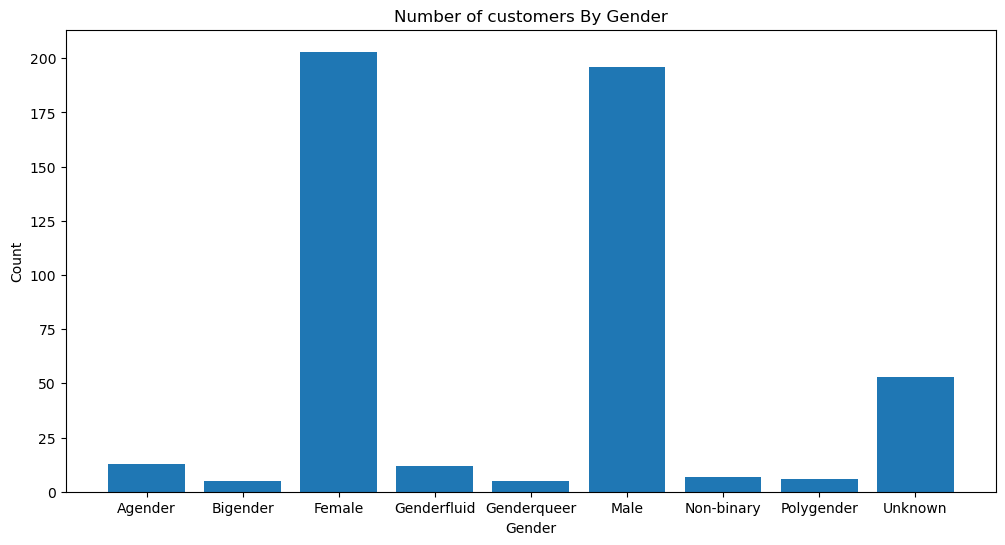

In [25]:
## a - Count the number of customers by gender

df_gender_count = customers_df_copy.groupby('gender').size().reset_index(name = 'count')
df_gender_count
plt.figure(figsize= (12,6))
plt.bar(df_gender_count['gender'], df_gender_count['count'])
plt.title('Number of customers By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

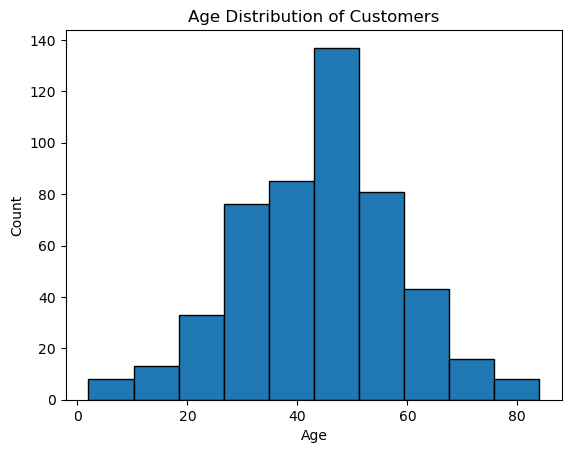

In [26]:
## b - Plot the customer age distribution with histogram chart
plt.hist(customers_df_copy['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [27]:
## c - Find what is the year with most joining customers to the company

customers_df_copy['joining_date'] = pd.to_datetime(customers_df_copy['joining_date'])
customers_df_copy = customers_df_copy.set_index('joining_date')
joining_by_years = customers_df_copy.resample(rule= 'YE').size().reset_index(name = 'count')

joining_by_years.sort_values(by = ['count'], ascending= False, inplace = True)
joining_by_years['year'] = joining_by_years['joining_date'].dt.strftime('%Y')
joining_by_years = joining_by_years[(joining_by_years['year']!= '2025') &(joining_by_years['year']!= '2024')]
customers_df_copy.reset_index(inplace = True)

print(f"The year with most joining customers to the company {joining_by_years.iloc[0]['year']} with registered students: {joining_by_years.iloc[0]['count']}")


The year with most joining customers to the company 2022 with registered students: 163


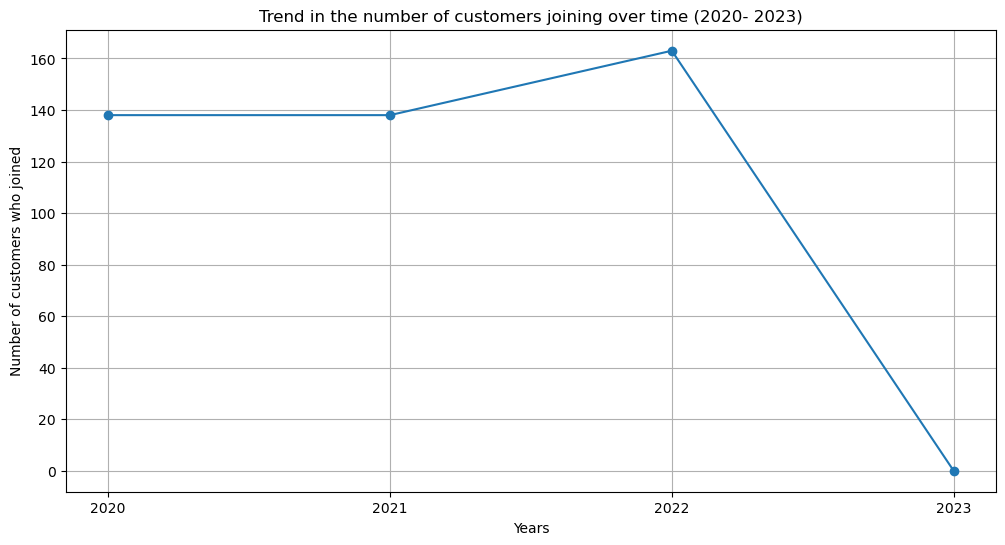

In [28]:
## d Examine prevailing trend in customer joining over the timeframe from 2020 to 2023.

joining_by_years.sort_values(by = ['year'], inplace = True)

plt.figure(figsize=(12,6))
plt.plot(joining_by_years['year'], joining_by_years['count'], marker='o')
plt.title('Trend in the number of customers joining over time (2020- 2023)')
plt.xlabel('Years')
plt.ylabel('Number of customers who joined')
plt.grid()
plt.show()

According to the graph, it can be seen that in 2020-2022 there was no increase in the number of customers who joined each year, each year the same number of people joined.

But in 2022 there was an increase.

In addition, since the customer data is up to and including 2023, there is no data on customers who joined in 2023, and therefore it is 0 joiners, but that does not mean that there was a decrease.

Therefore, I will define it as an upward trend.
    

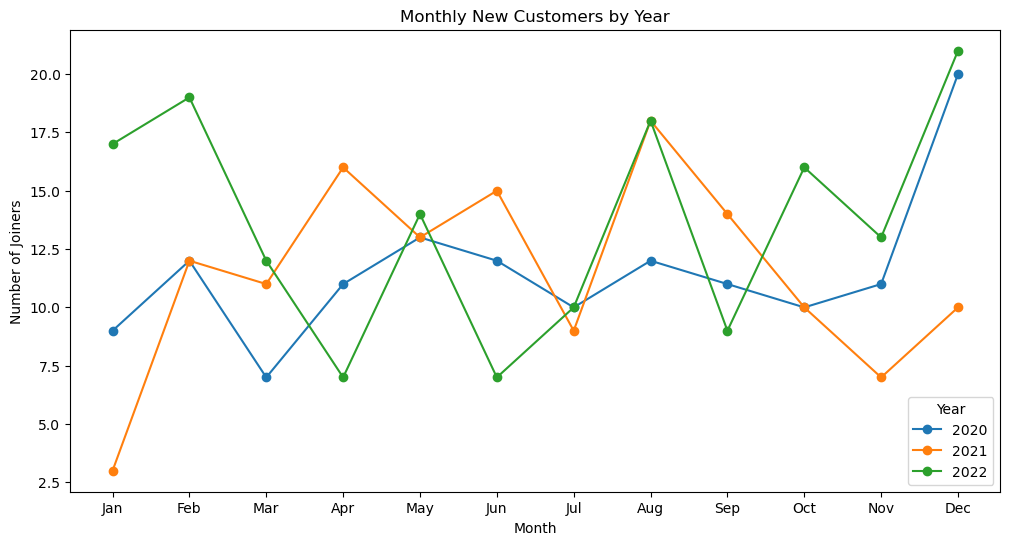

In [30]:
# e Examine the prevailing trend in customer acquisition across months and seasons

customers_df_copy['joining_date'] = pd.to_datetime(customers_df_copy['joining_date'])
customers_df_copy = customers_df_copy.set_index('joining_date')
joining_by_Month = customers_df_copy.resample(rule = 'ME').size().reset_index(name = 'count')

joining_by_Month['year'] = joining_by_Month['joining_date'].dt.strftime('%Y')
joining_by_Month = joining_by_Month[(joining_by_Month['year']!='2024')& (joining_by_Month['year']!='2025') & (joining_by_Month['year']!='2023')]
joining_by_Month['Month_name'] = joining_by_Month['joining_date'].dt.strftime('%b')
joining_by_Month['Month'] = joining_by_Month['joining_date'].dt.month
customers_df_copy.reset_index(inplace = True)

year_month_df = joining_by_Month.groupby(['year', 'Month', 'Month_name'])['count'].sum().reset_index() .sort_values(['year', 'Month'])
year_month_df

plt.figure(figsize=(12,6))
for year in year_month_df['year'].unique():
    df_year = year_month_df[year_month_df['year'] == year]
    plt.plot(df_year['Month_name'], df_year['count'], marker='o', label=str(year))
    

plt.title('Monthly New Customers by Year')
plt.xlabel('Month')
plt.ylabel('Number of Joiners')
plt.legend(title='Year')
plt.show()

From the graph, it can be seen that there are months in which the number of new customers is consistently high over the years, especially the months of August and December, in which there is a trend of increasing the number of registrations every year.

Therefore, it can be seen that there is a seasonality in registrations.

## 2 - Explore the items_df_copy

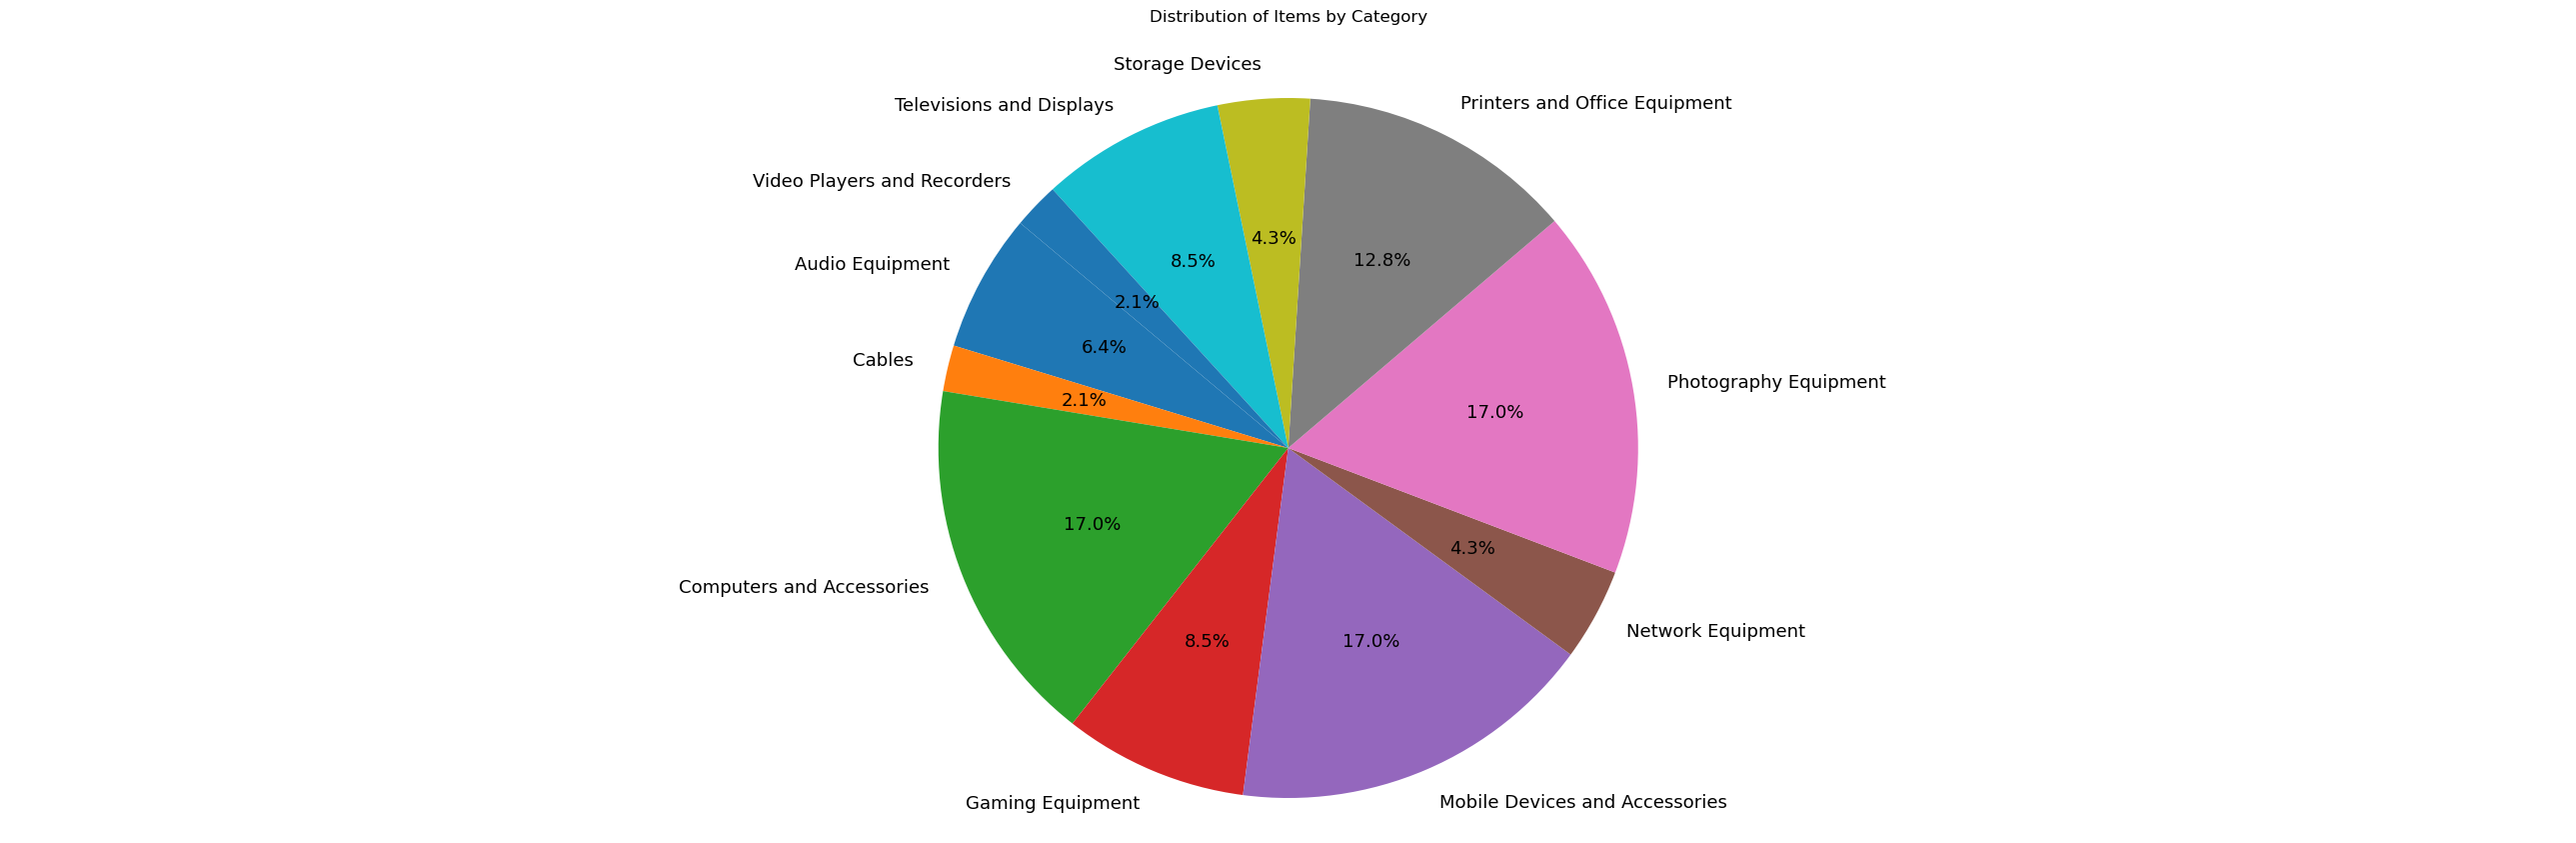

In [33]:
## a - Count the number of items by category
plt.figure(figsize= (33,10))
category_counts  = items_df_copy.groupby('item_category').size().reset_index(name = 'item_count')
category_counts
plt.pie(category_counts['item_count'], labels=category_counts['item_category'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 13})
plt.title('Distribution of Items by Category', pad = 30)
plt.axis('equal') 
plt.show()

In [34]:
# b Create a new dataframe containing the item with largest quantity in stock and the lowest quantity in stock

stock_quantity_null_df #I saved it before I replaced the null.
filter_default_df = items_df_copy[~items_df_copy['id'].isin(stock_quantity_null_df['id'])]
biggest_and_smallest =filter_default_df[(filter_default_df['stock_quantity'] == filter_default_df['stock_quantity'].max()) | (filter_default_df['stock_quantity'] == filter_default_df['stock_quantity'].min())]
biggest_and_smallest

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
33,35,Wi-Fi Router,Network Equipment,3812.53,14.0,Microsoft,True
39,41,VR Headset,Gaming Equipment,1905.01,1367.0,JBL,True


In [35]:
# c Calculate the mean quantity in stock of all items

average = filter_default_df['stock_quantity'].mean()
print(f"The mean quantity in stock of all items is {average}")

The mean quantity in stock of all items is 749.7209302325581


## 3 - Explore orders_df_copy

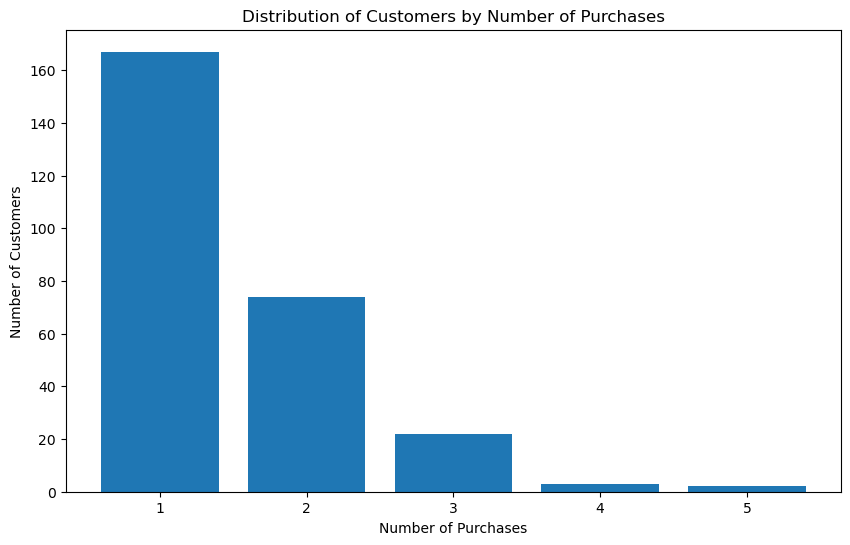

In [37]:
# a Calculate the number of customers based on the number of purchases they made.
Number_by_Customers_df = orders_df_copy.groupby(['customer_id']).size().reset_index(name = 'num_order')
Number_by_Orders_df = Number_by_Customers_df.groupby(['num_order']).size().reset_index(name = 'num_customers')
Number_by_Orders_df

plt.figure(figsize=(10,6))
plt.bar(Number_by_Orders_df['num_order'], Number_by_Orders_df['num_customers'])
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Number of Purchases')
plt.show()

In [38]:
# b Find the top 5 customers that ordered the most orders.

customer_order_df = orders_df_copy['customer_id'].value_counts().reset_index(name='count')
buy_the_most = customer_order_df.head(5)
buy_the_most
result = buy_the_most.merge(customers_df_copy, left_on = 'customer_id', right_on = 'id', how = 'inner')
result = result[['id','first_name','last_name']]
result

,id,first_name,last_name
0,59,Merill,Lacroutz
1,138,Ellary,Ledner
2,204,Sharon,Wilby
3,286,Rolfe,Gravenell
4,63,Dorine,Cauldfield


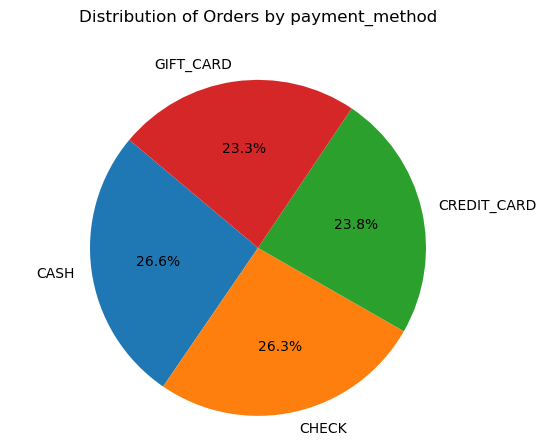

In [39]:
# c Calculate for each payment method how many customers are paying with it.
payment_method_df = orders_df_copy.groupby('payment_method')['customer_id'].nunique().reset_index(name = 'count')
payment_method_df
plt.pie(payment_method_df['count'], labels=payment_method_df['payment_method'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by payment_method',pad= 30)
plt.axis('equal') 
plt.show()


## 4 - Explore all the database

In [41]:
orders_df_copy[~orders_df_copy['order_id'].isin(order_item_df_copy['order_id'])]

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source


In [42]:
order_item_df_copy[~order_item_df_copy['item_id'].isin(items_df_copy['id'])]

,Unnamed: 0,id,order_id,item_id,quantity


In [43]:
# a. Add a new column to the orders.csv dataset that show the total price of each order.
order_item = orders_df_copy.merge(order_item_df_copy, on = 'order_id' , how = 'inner' )
order_item_price = order_item.merge(items_df_copy, left_on = 'item_id', right_on = 'id', how = 'inner' )
order_item_price = order_item_price[['order_id','item_id','quantity','item_price']]
order_item_price['total_sum'] = order_item_price['quantity']* order_item_price['item_price']
order_item_price
order_price = order_item_price.groupby(['order_id'])['total_sum'].sum().reset_index(name = 'total_price')
orders_df_copy = orders_df_copy.merge(order_price , on = 'order_id' , how = 'inner' )
orders_df_copy[orders_df_copy['total_price'].isna()]

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price


At first I checked that all orders (**orders_df_copy**) were in **order_item_df_copy** (I also checked **items** and **item_order**), so that I could perform an inner operation, and after verifying this, I did the merge.
Therefore, there are no orders that were deleted from the merge operation or that had null in the new column.
And I added the column in **orders_df_copy**, because at the beginning of the sections you wrote to use the copy and not the original.

In [45]:
orders_df_copy

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
0,1,477.0,576 Cordelia Place,2.000000,2023-12-05,GIFT_CARD,WEBSITE,8554.20
1,2,93.0,4664 6th Drive,4.000000,2023-08-17,CASH,STORE,10148.58
2,3,474.0,8766 4th Point,4.000000,2023-02-25,CHECK,STORE,6843.36
3,4,333.0,31 Bonner Way,3.000000,2023-02-04,CASH,STORE,965.20
4,5,436.0,20352 Shelley Way,5.000000,2023-06-01,CASH,STORE,63944.94
...,...,...,...,...,...,...,...,...
398,593,292.0,90001 Kedzie Point,3.890947,2023-09-16,CREDIT_CARD,WEBSITE,2301.74
399,594,480.0,242 Brown Avenue,6.000000,2023-02-18,GIFT_CARD,STORE,54186.82
400,596,110.0,26 Hudson Lane,5.000000,2023-10-30,CREDIT_CARD,WEBSITE,5270.24
401,597,209.0,37392 Sullivan Park,4.000000,2023-08-23,CREDIT_CARD,WEBSITE,1710.84


In [46]:
# b show what is the max, min and mean of the orders total price
aggregate_df = orders_df_copy.agg({'total_price': ['min', 'max', 'mean'] })
aggregate_df

,total_price
min,241.540000
max,69581.820000
mean,14088.706749


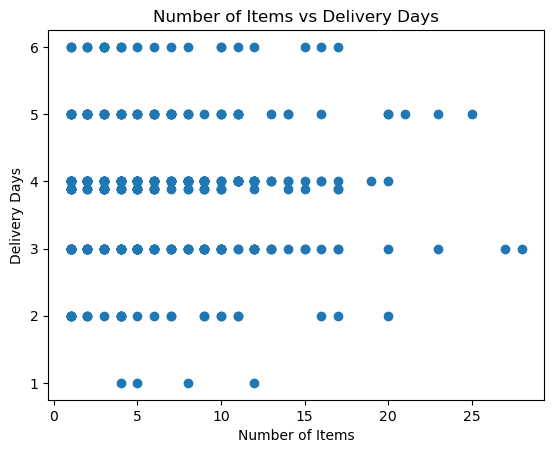

In [47]:
# c - Plot a scatter plot for number of items in order and the delivery time

number_items_df  = order_item_df_copy.groupby('order_id')['quantity'].sum().reset_index(name = 'number_items')
number_delivery_time_df = number_items_df.merge(orders_df_copy, on = 'order_id', how = 'inner')
number_delivery_time_df = number_delivery_time_df[['order_id', 'number_items','delivery_days']]

plt.scatter(number_delivery_time_df['number_items'], number_delivery_time_df['delivery_days'])
plt.title('Number of Items vs Delivery Days')
plt.xlabel('Number of Items')
plt.ylabel('Delivery Days')
plt.show()

According to the scatterplot, there is no correlation between the number of items in the order and the delivery time.

(The points appear to be randomly scattered, with no clear trend line going up or down.)

Therefore, increasing the number of items will not necessarily increase the delivery time.

In [49]:
# d Find how many customers never created any order.

num_df = customers_df_copy[~customers_df_copy['id'].isin(orders_df_copy['customer_id'])]
num = num_df['id'].count()
print(num)

232


Because the orders file only contains orders from 2023, it is impossible to know for sure from this whether there are people who never ordered.
                                                                                
Because this was the only option to check, so I gave this answer - the number of people who did not order in 2023 :)

In [51]:
# e Find what are the top 5 items that has been ordered the lowest
item_count_df =   order_item_df_copy.groupby('item_id')['quantity'].sum().reset_index(name = 'count')

item_name_count_df = item_count_df.merge(items_df_copy, left_on='item_id',right_on = 'id', how='inner')
item_name_count_df = item_name_count_df[['item_name', 'count']]
item_name_count_df = item_name_count_df.sort_values('count')
least_requested_items = item_name_count_df.head(5).reset_index(drop = True)
least_requested_items

,item_name,count
0,Webcam,24
1,Surge Protector,25
2,External Hard Drive,29
3,Printer,31
4,CCTV Camera,32


# Bonus → Decision making (10 Points):

## 1 -  Check if a campaign starting in August 2023 in USA is beneficial

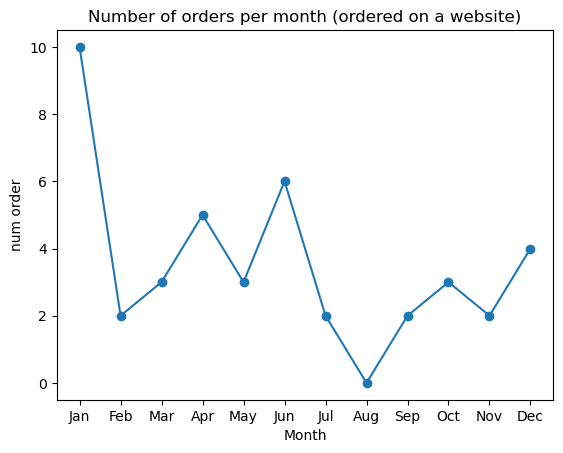

In [54]:
USA_customers = customers_df_copy[customers_df_copy['nationallity'] == 'United States']
orders_by_USA_customers = orders_df_copy[orders_df_copy['customer_id'].isin(USA_customers['id'])].copy()
orders_by_USA_customers = orders_by_USA_customers[orders_by_USA_customers['order_source'] == 'WEBSITE']

orders_by_USA_customers['order_date'] = pd.to_datetime(orders_by_USA_customers['order_date']) 
orders_by_USA_customers = orders_by_USA_customers.set_index('order_date')
orders_by_month = orders_by_USA_customers.resample(rule= 'ME').size().reset_index(name = 'order_num')
orders_by_month['order_date'] = orders_by_month['order_date'].dt.strftime('%b')
orders_by_USA_customers.reset_index(inplace = True)

plt.plot(orders_by_month['order_date'], orders_by_month['order_num'] ,marker = 'o')
plt.title('Number of orders per month (ordered on a website)')
plt.xlabel('Month')
plt.ylabel('num order')
plt.show()

I built the graph based on customers from the USA who ordered items through the website throughout the months of the year.

The graph shows that in July and August the number of users on the site decreased, but since the campaign started in August, it began to increase in the following months, so I assume the campaign was useful.

## 2 - Check whether discounted prices for gift card users increase sales in August

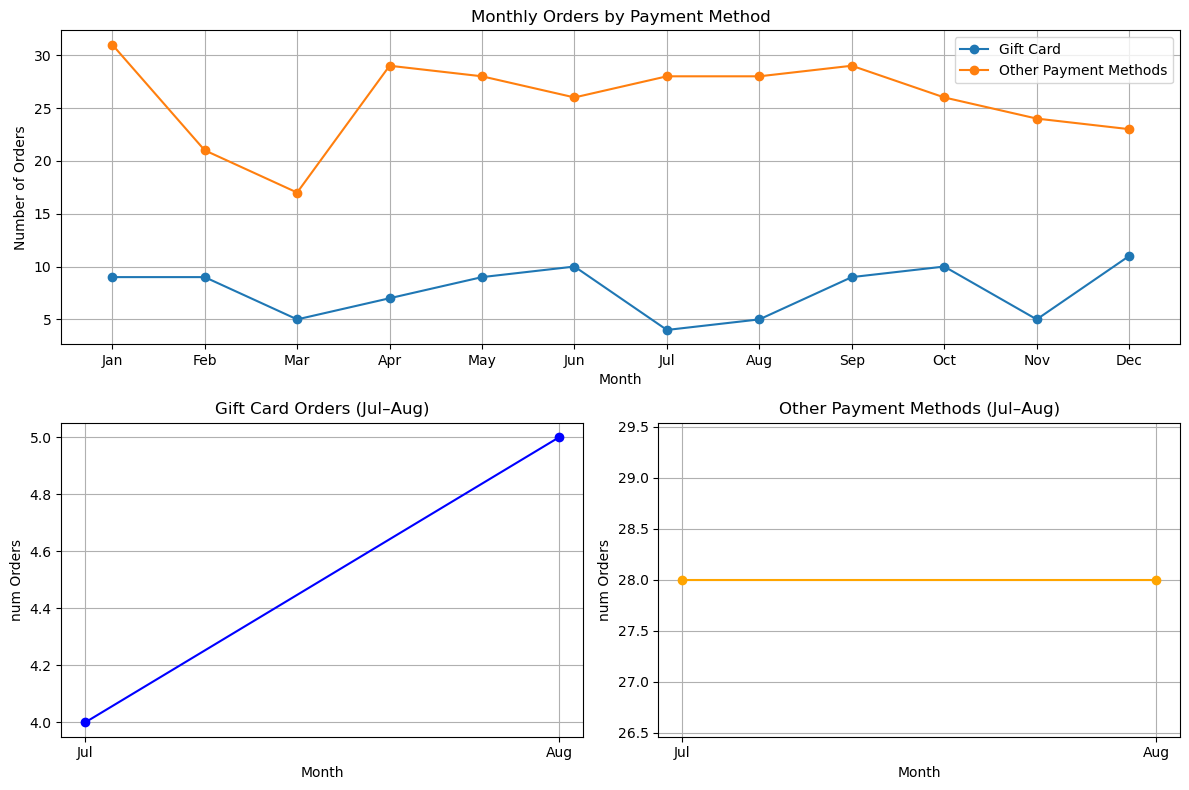

In [57]:
orders_df_copy['order_date'] = pd.to_datetime(orders_df_copy['order_date']) 
orders_df_copy.set_index('order_date', inplace = True)

gift_card_orders = orders_df_copy[orders_df_copy['payment_method'] == 'GIFT_CARD']
gift_card_monthly = gift_card_orders.resample('ME').size().reset_index(name='count_gift_card_orders')

other_payment_orders = orders_df_copy[orders_df_copy['payment_method'] != 'GIFT_CARD']
other_payment_monthly = other_payment_orders.resample('ME').size().reset_index(name='count_other_payment_orders')

type_payment_by_Month = gift_card_monthly.merge(other_payment_monthly, on='order_date', how='inner')
type_payment_by_Month['Month'] = type_payment_by_Month['order_date'].dt.strftime('%b')

zoom_df = type_payment_by_Month[type_payment_by_Month['Month'].isin(['Jul', 'Aug'])]

orders_df_copy.reset_index(inplace = True)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(type_payment_by_Month['Month'], type_payment_by_Month['count_gift_card_orders'], marker='o', label='Gift Card')
plt.plot(type_payment_by_Month['Month'], type_payment_by_Month['count_other_payment_orders'], marker='o', label='Other Payment Methods')
plt.title('Monthly Orders by Payment Method')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(zoom_df['Month'], zoom_df['count_gift_card_orders'], marker='o', color='blue')
plt.title('Gift Card Orders (Jul–Aug)')
plt.xlabel('Month')
plt.ylabel('num Orders')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(zoom_df['Month'], zoom_df['count_other_payment_orders'], marker='o', color='orange')
plt.title('Other Payment Methods (Jul–Aug)')
plt.xlabel('Month')
plt.ylabel('num Orders')
plt.grid(True)

plt.tight_layout()
plt.show()


According to the graph, it can be seen that during the month of August 2023, the number of orders using gift cards increased by only one order compared to the July.

It can be seen that the increase was not related to a general increase in sales, because for orders using other payment methods, the number of sales did not increase.

But since the number of orders increased by only one order, I do not think that the campaign contributed to the increase.